Data Prep

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'train_data'
empty_dir = os.path.join(data_dir, 'empty')
not_empty_dir = os.path.join(data_dir, 'not_empty')

In [3]:
IMG_WIDTH = 15
IMG_HEIGHT = 15

def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))
        img_array = np.array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    
    return np.array(images), np.array(labels)

empty_imgs, empty_labels = load_images(empty_dir, 0)
not_empty_imgs, not_empty_labels = load_images(not_empty_dir, 1)

images = np.concatenate((not_empty_imgs, empty_imgs), axis=0)
labels = np.concatenate((not_empty_labels, empty_labels), axis=0)

indices = np.arange(len(images))
np.random.shuffle(indices)

images = images[indices]
labels = labels[indices]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

MODEL

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras import optimizers

In [7]:
# Define a faster and simpler model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(15, 15, 3), padding='same'))  # Reduced filters
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))  # Reduced filters
model.add(MaxPooling2D((2, 2)))

# Optional: Use Flatten instead of Global Average Pooling
model.add(Flatten())

# Reduce the size of the dense layer
model.add(Dense(64, activation='relu'))  # Reduced number of neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3),
              metrics=['accuracy'])


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# # Define the model
# model = Sequential()

# # Simplified architecture with smaller input and fewer pooling layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 3), padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# # Instead of shrinking dimensions too much, we use Global Average Pooling
# model.add(GlobalAveragePooling2D())

# # Fully connected layers
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-3),
#               metrics=['accuracy'])

In [8]:
batch_size = 32  # You can adjust this
epochs = 14      # Set the number of epochs for training

# Training the model
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True   # Shuffle training data at the beginning of each epoch
)

Epoch 1/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3863
Epoch 2/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.0853
Epoch 3/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0435
Epoch 4/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0271
Epoch 5/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0170
Epoch 6/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0118
Epoch 7/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 8/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0048
Epoch 9/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 10/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0025
Epoch 11/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0027
Epoch 12/14
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

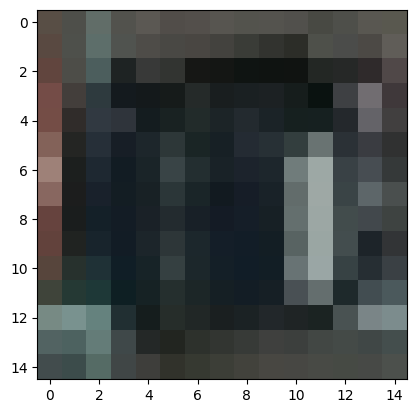

In [9]:
test_image = X_test[5]
img = np.expand_dims(test_image, axis=0)
plt.imshow(test_image)

model.predict(img1)

In [10]:
result = model.predict(img)

if result[0] > 0.5:
    print('Full')
else:
    print('Empty')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Full


In [11]:
#Save Model
model.save('parkingspotModel.keras')

In [12]:
from tensorflow.keras.models import load_model
mymodel = load_model('parkingspotModel.keras')

In [13]:
print(tf.__version__)

2.16.1
